<a href="https://colab.research.google.com/github/NELopatin-dev/IndividualWorkBTC/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание**

Есть данные о цене битка от времени. Цену отрисовываем японскими свечами. Внизу барами
визуализируем объемы. На панели выводим выбор таймфрейма. Добавляем отрисовку
простейших индикаторов: RSI, Bollinger line, MA200. Настройки для каждого индикатора на панели
по клику.
Делаем без привлечения сторонних библиотек, пробуем через костыли в matplotlib и seaborn

---

**Выполнили:**
*Одинаев Георгий и Лопатин Никита*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from google.colab import drive
from google.colab import files

from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets


import random
import datetime
import matplotlib
# from mpl_finance import candlestick_ohlc

from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import time

In [ ]:
uploaded = files.upload()

In [2]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
drive.flush_and_unmount()

Mounted at /content/drive


In [3]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


#Часть Георгия
Тут Георгий пока японские свечи делает. Потом соеденим всё вместе в одно

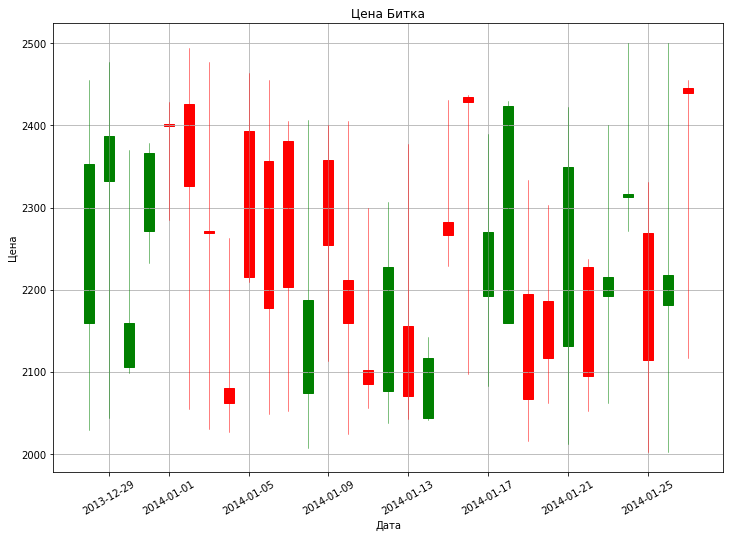

In [ ]:
# start="2020-1-1"
# data=[]
# for i in range(31):    
#     random_data=[random.randint(2000,2500) for _ in range(4)]
#     sorted_data=sorted(random_data)
#     day=matplotlib.dates.date2num(datetime.datetime.strptime(start,'%Y-%m-%d'))
#     # print(day)
#     if i==0:
#         one=(day,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])       
#     else:
#         one=(day+i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day+i,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])
#     data.append(one)

# def candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r',
#                      alpha=1.0):
#   return _candlestick(ax, quotes, width=width, colorup=colorup,
#                         colordown=colordown,
#                         alpha=alpha, ochl=False)
# def _candlestick(ax, quotes, width=0.2, colorup='k', colordown='r',
#                  alpha=1.0, ochl=True):
#     OFFSET = width / 2.0

#     lines = []
#     patches = []
#     for q in quotes:
#         if ochl:
#             t, open, close, high, low = q[:5]
#         else:
#             t, open, high, low, close = q[:5]

#         if close >= open:
#             color = colorup
#             lower = open
#             height = close - open
#         else:
#             color = colordown
#             lower = close
#             height = open - close

#         vline = Line2D(
#             xdata=(t, t), ydata=(low, high),
#             color=color,
#             linewidth=0.5,
#             antialiased=True,
#         )

#         rect = Rectangle(
#             xy=(t - OFFSET, lower),
#             width=width,
#             height=height,
#             facecolor=color,
#             edgecolor=color,
#         )
#         rect.set_alpha(alpha)

#         lines.append(vline)
#         patches.append(rect)
#         ax.add_line(vline)
#         ax.add_patch(rect)
#     ax.autoscale_view()

#     return lines, patches


# fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
# fig.subplots_adjust(bottom=0.1)
# ax.xaxis_date()
# plt.xticks(rotation=30)
# plt.title('Цена Битка')
# plt.xlabel('Дата')
# plt.ylabel('Цена')
# plt.grid(True)


# candlestick_ohlc(ax,data,width=0.5,colorup='r',colordown='green') ;


# print(time.localtime(1360250344))
# print(time.localtime(1325317980))
# print(time.strftime('%Y-%m-%d', time.localtime(1388232360)))
start=time.strftime('%Y-%m-%d', time.localtime(1388232360))
data=[]
for i in range(31):    
    random_data=[random.randint(2000,2500) for _ in range(4)]
    sorted_data=sorted(random_data)
    day=matplotlib.dates.date2num(datetime.datetime.strptime(start,'%Y-%m-%d'))
    # print(day)
    if i==0:
        one=(day,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])       
    else:
        one=(day+i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day+i,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])
    data.append(one)
    # print(one)
    # print(one[0],type(one[0]))
    # print(one[1],type(one[1]))
    # print(one[2],type(one[2]))
    # print(one[3],type(one[3]))
    # print(one[4],type(one[4]))
def candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r',
                     alpha=1.0):
  return _candlestick(ax, quotes, width=width, colorup=colorup,
                        colordown=colordown,
                        alpha=alpha, ochl=False)
def _candlestick(ax, quotes, width=0.2, colorup='k', colordown='r',
                 alpha=1.0, ochl=True):
    OFFSET = width / 2.0

    lines = []
    patches = []
    for q in quotes:
        if ochl:
            t, open, close, high, low = q[:5]
        else:
            t, open, high, low, close = q[:5]

        if close >= open:
            color = colorup
            lower = open
            height = close - open
        else:
            color = colordown
            lower = close
            height = open - close

        vline = Line2D(
            xdata=(t, t), ydata=(low, high),
            color=color,
            linewidth=0.5,
            antialiased=True,
        )

        rect = Rectangle(
            xy=(t - OFFSET, lower),
            width=width,
            height=height,
            facecolor=color,
            edgecolor=color,
        )
        rect.set_alpha(alpha)

        lines.append(vline)
        patches.append(rect)
        ax.add_line(vline)
        ax.add_patch(rect)
    ax.autoscale_view()

    return lines, patches


fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
plt.xticks(rotation=30)
plt.title('Цена Битка')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)


candlestick_ohlc(ax,data,width=0.5,colorup='r',colordown='green') ;

In [ ]:
# сверху работающая шутка на рандомных данных, а внизу работающая через жопу шутка на данных из csv
data = data.loc[data['Open'] > 0 ]

def candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0):
    return _candlestick(ax, quotes, width=width, colorup=colorup,colordown=colordown,alpha=alpha, ochl=False)

def _candlestick(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0, ochl=True):
    OFFSET = width / 2.0

    lines = []
    patches = []
    for q in range(quotes.shape[0]):
        if ochl:
           
            t, open, close, high, low = quotes.iloc[q][:5]
        else:
#             print(quotes.shape[0])
#             print(quotes.iloc[1])
# #             print(quotes.loc[1])
            
#             print(quotes.iloc['Open'][0])
#             print(q.iloc[0])
            t, open, high, low, close = quotes.iloc[q][:5]
#             print(quotes.iloc[q])
#             print(quotes.iloc[q][0],quotes.iloc[q][1])
            
        day_unixtime=time.strftime('%Y-%m-%d', time.localtime(cell))
        t=matplotlib.dates.date2num(datetime.datetime.strptime(day_unixtime,'%Y-%m-%d'))
        print(t, open, high, low, close)
        if close >= open:
            color = colorup
            lower = open
            height = close - open
        else:
            color = colordown
            lower = close
            height = open - close

        vline = Line2D(
            xdata=(t, t), ydata=(low, high),
            color=color,
            linewidth=0.5,
            antialiased=True,
        )

        rect = Rectangle(
            xy=(t - OFFSET, lower),
            width=width,
            height=height,
            facecolor=color,
            edgecolor=color,
        )
        rect.set_alpha(alpha)

        lines.append(vline)
        patches.append(rect)
        ax.add_line(vline)
        ax.add_patch(rect)
    ax.autoscale_view()

    return lines, patches


fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
plt.xticks(rotation=30)
plt.title('Цена Битка')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)

# print(data.head(10))
candlestick_ohlc(ax,data.tail(10),width=0.5,colorup='r',colordown='green') ;

#Часть Никиты
Тут Никита пока кнопки делает. Потом соеденим всё вместе в одно

In [ ]:
text = widgets.Text(
    value='My Text',
    description='Title', 
  )

calendar = widgets.DatePicker(
    description='Select Date'
  )

slider = widgets.FloatSlider(
    value=1,
    min=0,
    max=10.0,
    step=0.1,
  )

menu = widgets.Dropdown(
    options=['red', 'blue', 'green'],
    value='red',
    description='Color:'
  )

checkbox = widgets.Checkbox(
      description='Check to invert',
    )

In [ ]:
box = widgets.VBox([text, slider, menu, calendar, checkbox ])
box

In [ ]:
widgets.HBox([box, box])

In [ ]:
# defining a list with the contents of our windows
children = [box, box]# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children# changing the title of the first and second window
tab.set_title(0, 'box')
tab.set_title(1, 'copy of box')
tab

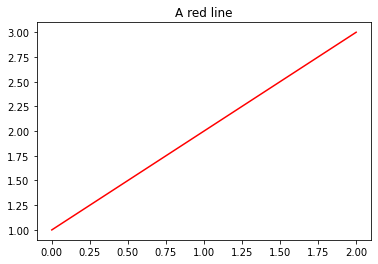

In [ ]:
plt.plot([1,2,3], color = menu.value)
plt.title('A {} line'.format(menu.value))
plt.show()

In [ ]:
button = widgets.Button(description='My Button')
button

Button(description='My Button', style=ButtonStyle())

In [ ]:
button = widgets.Button(description='My Button')
out = widgets.Output()

def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
          clear_output()
          print('Something happens!')
          
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])

In [ ]:
# Using output to display Markdown
markdown_out = widgets.Output()
with markdown_out:
    display(Markdown('Slider value is ${}$'.format(slider.value)))
    
markdown_out

Output()

In [ ]:
# some options
a, b = 1, 5
# selecting global variables without underscores
global_variables = list(globals().keys())
funcs = []
for i in global_variables:
    if '_' not in i:
        funcs.append(i)
 
# creating menu with them   
global_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        print(type(globals()[global_vars.value]))
        print(globals()[global_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([global_vars,butt,outt])

In [ ]:
from IPython.core.display import display, HTML, Markdown, clear_output
import json

# Defining Widgets: 
equation = widgets.Text(
            value='np.sin(X*Y)+np.cos(X+Y)',
            placeholder='Type something',
            description='Equation:')
range_ = widgets.FloatRangeSlider(
    value=[-5, 5],
    min=-100,
    step=0.1,
    description='range:',
    orientation='horizontal',
    readout=True,
    readout_format='d',)
points = widgets.IntText(
    value=50,
    description='Detail:')

# DEFINING FUNCTIONS
def plot2D(x_points):
    # I find where the letter X is in my equation text and replace by placeholders {}
    number_of_placeholders = equation.value.count('X')
    decomposed_equation = equation.value.replace('X', '{}')
    y = []
    for point in x_points:
        dicti = {i: point for i in range(number_of_placeholders)}
        decomposed_eq = decomposed_equation.format(*dicti.values())   
        # WARNING: couldn't figure out any other way, let me know if you know
        exec("""global res
res = {}""".format(decomposed_eq))
        y.append(res)
    plt.plot(x_points, y)
    plt.show()

def plot3D(X, Y, Z):
    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": True,
        "keepAspectRatio": False,
        "height": "600px"}
     # LOADING DATA
    data = [ {"x": X[y,x], 
              "y": Y[y,x], 
              "z": Z[y,x]} for y in range(Y.shape[0]) for x in range(Y.shape[1]) ]  
    visual_code = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>      
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        // setting the camera position initial
        graph3d.setCameraPosition({horizontal:0.8197963, vertical:0.945, distance:1.988})
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "Horizontal: " + evt.horizontal + "<br>Vertical: " + evt.vertical + "<br>Camera Distance: " + evt.distance;
        });
       </script>
    """
    html= "<iframe srcdoc='"+visual_code+"' width='75%' height='600px' style='border:10;' scrolling='no'> </iframe>"
    display(HTML(html))
    
# CREATING BUTTON
# if X and Y are inside equation.value we run plot3D
# otherwise we run plot2D
button = widgets.Button(description='Reveal Equation')
out = widgets.Output()
def on_button_clicked(b):
    global X, Y
    with out:
        clear_output()    
        # computing the x points to evaluate our function
        x_points = np.linspace(range_.value[0], 
            range_.value[1], points.value)
        X, Y = np.meshgrid(x_points, x_points)
        # WARNING: couldn't figure out any other way, let me know if you know
        exec("""global Z
Z = {}
""".format(equation.value))
        if 'Y' in equation.value and 'X' in equation.value:
            plot3D(X,Y,Z)
        elif 'Y' in equation.value:
            equation.value = equation.value.replace('Y', 'X')
            plot2D(x_points)
        else:
            plot2D(x_points)    
button.on_click(on_button_clicked)
info = Markdown("""# 2D/3D Grapher
- Write down the equation you want to plot in the Equation window. 
- If only $X$ or $Y$ is defined in the equation a 2D plot will be shown.
- If $Y$ and $X$ are defined a 3D plot will be shown.
- Detail specifies the number of points created between the specified range.""")
grapher = widgets.VBox([points, range_,  equation, button, out])
display(info, grapher)

# 2D/3D Grapher
- Write down the equation you want to plot in the Equation window. 
- If only $X$ or $Y$ is defined in the equation a 2D plot will be shown.
- If $Y$ and $X$ are defined a 3D plot will be shown.
- Detail specifies the number of points created between the specified range.